# Análisis Exploratorio de Datos - Matrimonios

**Problema de Investigación:** Matrimonios que terminan en problemas de violencia intrafamiliar y en muertes por violencia

Este notebook contiene el análisis de los datos de matrimonios del INE (2009-2020) como parte del proyecto de Minería de Datos.

## Estructura del Análisis
- **Inciso a:** Descripción del conjunto de datos
- **Inciso b:** Resumen de variables numéricas y categóricas
- **Inciso c:** Cruce de variables clave

## 1. Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
from scipy import stats
from scipy.stats import shapiro, normaltest, anderson
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Librerías importadas correctamente")

Matplotlib is building the font cache; this may take a moment.


✓ Librerías importadas correctamente


## 2. Carga de Datos

Cargamos los archivos .sav de matrimonios desde 2009 hasta 2020 y los consolidamos en un único DataFrame.

In [2]:
# Lista para almacenar los DataFrames de cada año
dataframes = []

# Años disponibles
años = range(2009, 2021)

# Cargar cada archivo .sav
for año in años:
    try:
        archivo = f'../data/matrimonios/sav/{año}-matrimonios.sav'
        df, meta = pyreadstat.read_sav(archivo)
        df['año'] = año  # Agregar columna de año
        dataframes.append(df)
        print(f"✓ {año}: {len(df):,} registros cargados")
    except Exception as e:
        print(f"✗ Error cargando {año}: {str(e)}")

# Consolidar todos los DataFrames
df_matrimonios = pd.concat(dataframes, ignore_index=True)

print(f"\n{'='*50}")
print(f"Total de registros consolidados: {len(df_matrimonios):,}")
print(f"{'='*50}")

✓ 2009: 62,104 registros cargados
✓ 2010: 73,124 registros cargados
✓ 2011: 78,286 registros cargados
✓ 2012: 84,253 registros cargados
✓ 2013: 80,750 registros cargados
✓ 2014: 79,496 registros cargados
✓ 2015: 79,177 registros cargados
✓ 2016: 69,613 registros cargados
✓ 2017: 71,597 registros cargados
✓ 2018: 74,777 registros cargados
✓ 2019: 76,928 registros cargados
✓ 2020: 57,387 registros cargados

Total de registros consolidados: 887,492


---
# INCISO A: Descripción del Conjunto de Datos

Descripción de variables, observaciones y tipos de datos.

In [3]:
# Información general del dataset
print("="*80)
print("DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS")
print("="*80)
print(f"\nDimensiones del dataset:")
print(f"  • Número de observaciones (registros): {df_matrimonios.shape[0]:,}")
print(f"  • Número de variables (columnas): {df_matrimonios.shape[1]}")
print(f"  • Periodo analizado: 2009-2020 ({len(años)} años)")
print(f"  • Memoria utilizada: {df_matrimonios.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Vista previa de los datos
print("\n" + "="*80)
print("PRIMERAS 5 OBSERVACIONES")
print("="*80)
df_matrimonios.head()

DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS

Dimensiones del dataset:
  • Número de observaciones (registros): 887,492
  • Número de variables (columnas): 52
  • Periodo analizado: 2009-2020 (12 años)
  • Memoria utilizada: 625.94 MB

PRIMERAS 5 OBSERVACIONES


,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,GETHOM,GETMUJ,NACHOM,NACMUJ,OCUHOM,OCUMUJ,NUPHON,NUPMUJ,DEPOCU,MUPOCU,MESOCU,AÑOOCU,AREAG,año,Depreg,mupreg,Mesreg,Añoreg,Clauni,Edadhom,Edadmuj,Gethom,Getmuj,Nachom,Nacmuj,Eschom,Escmuj,Ocuhom,Ocumuj,Depocu,mupocu,Diaocu,Mesocu,Añoocu,Areag,ESCHOM,ESCMUJ,DIAOCU,PUEHOM,PUEMUJ,CIUOHOM,CIUOMUJ,AREAGOCU,NUNUHO,NUNUMU
0,12.0,1204,4.0,10.0,1.0,16.0,14.0,1.0,1.0,320.0,320.0,9999.0,9999.0,99.0,99.0,12.0,1204,9.0,9.0,9.0,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11.0,1101,5.0,9.0,1.0,16.0,14.0,9.0,9.0,320.0,320.0,6111.0,9711.0,99.0,99.0,11.0,1101,3.0,9.0,9.0,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13.0,1302,1.0,10.0,1.0,16.0,14.0,9.0,9.0,320.0,320.0,6111.0,9711.0,1.0,1.0,13.0,1302,12.0,9.0,9.0,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.0,1412,8.0,9.0,1.0,16.0,14.0,1.0,1.0,320.0,320.0,6111.0,9711.0,1.0,1.0,14.0,1412,7.0,9.0,9.0,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.0,1412,10.0,9.0,1.0,16.0,14.0,1.0,1.0,320.0,320.0,6111.0,9711.0,1.0,1.0,14.0,1412,10.0,9.0,9.0,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Análisis de tipos de datos
print("="*80)
print("TIPOS DE DATOS POR VARIABLE")
print("="*80)

# Clasificar variables por tipo
tipos_datos = df_matrimonios.dtypes.value_counts()
print(f"\nResumen de tipos de datos:")
for tipo, cantidad in tipos_datos.items():
    print(f"  • {tipo}: {cantidad} variables")

# Crear DataFrame con información detallada de cada variable
info_variables = pd.DataFrame({
    'Variable': df_matrimonios.columns,
    'Tipo_Pandas': df_matrimonios.dtypes.values,
    'Valores_Únicos': [df_matrimonios[col].nunique() for col in df_matrimonios.columns],
    'Valores_Nulos': [df_matrimonios[col].isnull().sum() for col in df_matrimonios.columns],
    'Porcentaje_Nulos': [f"{(df_matrimonios[col].isnull().sum() / len(df_matrimonios) * 100):.2f}%" for col in df_matrimonios.columns]
})

# Clasificar las variables en numéricas y categóricas
info_variables['Clasificación'] = info_variables['Tipo_Pandas'].apply(
    lambda x: 'Numérica' if x in ['int64', 'float64', 'int32', 'float32'] else 'Categórica'
)

print(f"\n{'='*80}")
print("DETALLE DE VARIABLES")
print("="*80)
info_variables

TIPOS DE DATOS POR VARIABLE

Resumen de tipos de datos:
  • float64: 41 variables
  • object: 10 variables
  • int64: 1 variables

DETALLE DE VARIABLES


,Variable,Tipo_Pandas,Valores_Únicos,Valores_Nulos,Porcentaje_Nulos,Clasificación
0,DEPREG,float64,22,151410,17.06%,Numérica
1,MUPREG,object,340,151410,17.06%,Categórica
2,MESREG,float64,12,151410,17.06%,Numérica
3,AÑOREG,float64,12,151410,17.06%,Numérica
4,CLAUNI,float64,4,151410,17.06%,Numérica
5,EDADHOM,float64,87,151410,17.06%,Numérica
6,EDADMUJ,float64,90,151410,17.06%,Numérica
7,GETHOM,float64,3,741135,83.51%,Numérica
8,GETMUJ,float64,3,741135,83.51%,Numérica
9,NACHOM,float64,129,151410,17.06%,Numérica


In [5]:
# Guardar la información de variables para documentación
info_variables.to_csv('resumen_variables_matrimonios.csv', index=False)

# Resumen por clasificación
print("\n" + "="*80)
print("RESUMEN POR CLASIFICACIÓN")
print("="*80)
resumen_clasificacion = info_variables.groupby('Clasificación').agg({
    'Variable': 'count',
    'Valores_Nulos': 'sum'
}).rename(columns={'Variable': 'Cantidad_Variables', 'Valores_Nulos': 'Total_Nulos'})

print(resumen_clasificacion)

print("\n" + "="*80)
print("VARIABLES NUMÉRICAS")
print("="*80)
vars_numericas = info_variables[info_variables['Clasificación'] == 'Numérica']['Variable'].tolist()
print(f"Total: {len(vars_numericas)} variables")
for var in vars_numericas:
    print(f"  • {var}")

print("\n" + "="*80)
print("VARIABLES CATEGÓRICAS")
print("="*80)
vars_categoricas = info_variables[info_variables['Clasificación'] == 'Categórica']['Variable'].tolist()
print(f"Total: {len(vars_categoricas)} variables")
for var in vars_categoricas:
    print(f"  • {var}")


RESUMEN POR CLASIFICACIÓN
               Cantidad_Variables  Total_Nulos
Clasificación                                 
Categórica                     10      5324952
Numérica                       42     20956548

VARIABLES NUMÉRICAS
Total: 42 variables
  • DEPREG
  • MESREG
  • AÑOREG
  • CLAUNI
  • EDADHOM
  • EDADMUJ
  • GETHOM
  • GETMUJ
  • NACHOM
  • NACMUJ
  • NUPHON
  • NUPMUJ
  • DEPOCU
  • MESOCU
  • AÑOOCU
  • AREAG
  • año
  • Depreg
  • Mesreg
  • Añoreg
  • Clauni
  • Edadhom
  • Edadmuj
  • Gethom
  • Getmuj
  • Nachom
  • Nacmuj
  • Eschom
  • Escmuj
  • Depocu
  • Diaocu
  • Mesocu
  • Añoocu
  • Areag
  • ESCHOM
  • ESCMUJ
  • DIAOCU
  • PUEHOM
  • PUEMUJ
  • AREAGOCU
  • NUNUHO
  • NUNUMU

VARIABLES CATEGÓRICAS
Total: 10 variables
  • MUPREG
  • OCUHOM
  • OCUMUJ
  • MUPOCU
  • mupreg
  • Ocuhom
  • Ocumuj
  • mupocu
  • CIUOHOM
  • CIUOMUJ


---
# INCISO B: Análisis de Variables

## B.1 Variables Numéricas: Estadísticas Descriptivas y Pruebas de Normalidad

In [6]:
# Identificar variables numéricas (excluyendo el año)
variables_numericas = df_matrimonios.select_dtypes(include=[np.number]).columns.tolist()
if 'año' in variables_numericas:
    variables_numericas.remove('año')

print("="*80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*80)
print(f"\nVariables numéricas a analizar: {len(variables_numericas)}\n")

# Estadísticas descriptivas
estadisticas_desc = df_matrimonios[variables_numericas].describe().T
estadisticas_desc['missing'] = df_matrimonios[variables_numericas].isnull().sum()
estadisticas_desc['missing_%'] = (estadisticas_desc['missing'] / len(df_matrimonios) * 100).round(2)

# Agregar coeficiente de variación
estadisticas_desc['cv'] = (estadisticas_desc['std'] / estadisticas_desc['mean'] * 100).round(2)

# Reorganizar columnas
estadisticas_desc = estadisticas_desc[['count', 'missing', 'missing_%', 'mean', 'std', 'cv', 'min', '25%', '50%', '75%', 'max']]

estadisticas_desc

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS

Variables numéricas a analizar: 41



,count,missing,missing_%,mean,std,cv,min,25%,50%,75%,max
DEPREG,736082.0,151410,17.06,9.521902,6.397720,67.19,1.0,4.0,10.0,14.0,22.0
MESREG,736082.0,151410,17.06,6.459790,3.599119,55.72,1.0,3.0,6.0,10.0,12.0
AÑOREG,736082.0,151410,17.06,1846.595792,557.757110,30.20,9.0,2013.0,2015.0,2018.0,2021.0
CLAUNI,736082.0,151410,17.06,2.877367,1.247966,43.37,1.0,3.0,3.0,3.0,9.0
EDADHOM,736082.0,151410,17.06,32.572992,56.710720,174.10,14.0,22.0,26.0,33.0,999.0
EDADMUJ,736082.0,151410,17.06,30.055317,60.507117,201.32,12.0,20.0,23.0,29.0,999.0
GETHOM,146357.0,741135,83.51,3.170802,3.098753,97.73,1.0,1.0,2.0,2.0,9.0
GETMUJ,146357.0,741135,83.51,3.371072,3.224149,95.64,1.0,1.0,2.0,2.0,9.0
NACHOM,736082.0,151410,17.06,321.799908,35.777921,11.12,8.0,320.0,320.0,320.0,9999.0
NACMUJ,736082.0,151410,17.06,321.694193,37.226457,11.57,25.0,320.0,320.0,320.0,9999.0


In [7]:
# Pruebas de normalidad para cada variable numérica
print("="*80)
print("PRUEBAS DE NORMALIDAD - VARIABLES NUMÉRICAS")
print("="*80)
print("\nNota: H0 = Los datos siguen una distribución normal")
print("      Si p-value < 0.05, rechazamos H0 (NO es normal)\n")

resultados_normalidad = []

for var in variables_numericas:
    # Eliminar valores nulos para las pruebas
    datos = df_matrimonios[var].dropna()
    
    if len(datos) > 3:  # Se necesitan al menos 3 observaciones
        # Shapiro-Wilk Test (mejor para muestras < 5000)
        if len(datos) <= 5000:
            stat_shapiro, p_shapiro = shapiro(datos.sample(min(5000, len(datos))))
        else:
            stat_shapiro, p_shapiro = np.nan, np.nan
        
        # D'Agostino's K-squared test (mejor para muestras grandes)
        try:
            stat_dagostino, p_dagostino = normaltest(datos)
        except:
            stat_dagostino, p_dagostino = np.nan, np.nan
        
        # Skewness y Kurtosis
        skewness = datos.skew()
        kurtosis = datos.kurtosis()
        
        resultados_normalidad.append({
            'Variable': var,
            'Shapiro_p': p_shapiro,
            'DAgostino_p': p_dagostino,
            'Skewness': skewness,
            'Kurtosis': kurtosis,
            'Es_Normal': 'Sí' if (p_shapiro > 0.05 or np.isnan(p_shapiro)) and (p_dagostino > 0.05 or np.isnan(p_dagostino)) else 'No'
        })

df_normalidad = pd.DataFrame(resultados_normalidad)
df_normalidad

PRUEBAS DE NORMALIDAD - VARIABLES NUMÉRICAS

Nota: H0 = Los datos siguen una distribución normal
      Si p-value < 0.05, rechazamos H0 (NO es normal)



,Variable,Shapiro_p,DAgostino_p,Skewness,Kurtosis,Es_Normal
0,DEPREG,NaN,0.0,0.137134,-1.110841,No
1,MESREG,NaN,0.0,0.036312,-1.291842,No
2,AÑOREG,NaN,0.0,-2.990646,6.944235,No
3,CLAUNI,NaN,0.0,2.843939,13.951462,No
4,EDADHOM,NaN,0.0,16.319766,274.970286,No
5,EDADMUJ,NaN,0.0,15.524631,245.549468,No
6,GETHOM,NaN,0.0,1.300704,-0.191907,No
7,GETMUJ,NaN,0.0,1.131214,-0.624359,No
8,NACHOM,NaN,0.0,37.459356,7430.422610,No
9,NACMUJ,NaN,0.0,56.694968,12536.840660,No


In [8]:
# Interpretación de los resultados de normalidad
print("="*80)
print("INTERPRETACIÓN DE RESULTADOS DE NORMALIDAD")
print("="*80)

normales = df_normalidad[df_normalidad['Es_Normal'] == 'Sí']
no_normales = df_normalidad[df_normalidad['Es_Normal'] == 'No']

print(f"\n✓ Variables con distribución normal: {len(normales)}")
if len(normales) > 0:
    for var in normales['Variable'].tolist():
        print(f"  • {var}")

print(f"\n✗ Variables sin distribución normal: {len(no_normales)}")
if len(no_normales) > 0:
    for idx, row in no_normales.iterrows():
        print(f"  • {row['Variable']}")
        if abs(row['Skewness']) > 1:
            sesgo = "muy sesgada a la derecha" if row['Skewness'] > 0 else "muy sesgada a la izquierda"
            print(f"    - Skewness: {row['Skewness']:.2f} ({sesgo})")
        if abs(row['Kurtosis']) > 3:
            curtosis = "leptocúrtica (colas pesadas)" if row['Kurtosis'] > 0 else "platicúrtica (colas ligeras)"
            print(f"    - Kurtosis: {row['Kurtosis']:.2f} ({curtosis})")

print("\n" + "="*80)
print("GUÍA DE INTERPRETACIÓN:")
print("="*80)
print("Skewness (Asimetría):")
print("  • ≈ 0: Distribución simétrica")
print("  • > 0: Sesgada a la derecha (cola larga a la derecha)")
print("  • < 0: Sesgada a la izquierda (cola larga a la izquierda)")
print("\nKurtosis (Curtosis):")
print("  • ≈ 0: Similar a distribución normal")
print("  • > 0: Leptocúrtica (pico alto, colas pesadas)")
print("  • < 0: Platicúrtica (pico bajo, colas ligeras)")

INTERPRETACIÓN DE RESULTADOS DE NORMALIDAD

✓ Variables con distribución normal: 0

✗ Variables sin distribución normal: 41
  • DEPREG
  • MESREG
  • AÑOREG
    - Skewness: -2.99 (muy sesgada a la izquierda)
    - Kurtosis: 6.94 (leptocúrtica (colas pesadas))
  • CLAUNI
    - Skewness: 2.84 (muy sesgada a la derecha)
    - Kurtosis: 13.95 (leptocúrtica (colas pesadas))
  • EDADHOM
    - Skewness: 16.32 (muy sesgada a la derecha)
    - Kurtosis: 274.97 (leptocúrtica (colas pesadas))
  • EDADMUJ
    - Skewness: 15.52 (muy sesgada a la derecha)
    - Kurtosis: 245.55 (leptocúrtica (colas pesadas))
  • GETHOM
    - Skewness: 1.30 (muy sesgada a la derecha)
  • GETMUJ
    - Skewness: 1.13 (muy sesgada a la derecha)
  • NACHOM
    - Skewness: 37.46 (muy sesgada a la derecha)
    - Kurtosis: 7430.42 (leptocúrtica (colas pesadas))
  • NACMUJ
    - Skewness: 56.69 (muy sesgada a la derecha)
    - Kurtosis: 12536.84 (leptocúrtica (colas pesadas))
  • NUPHON
  • NUPMUJ
  • DEPOCU
  • MESOCU
  • A

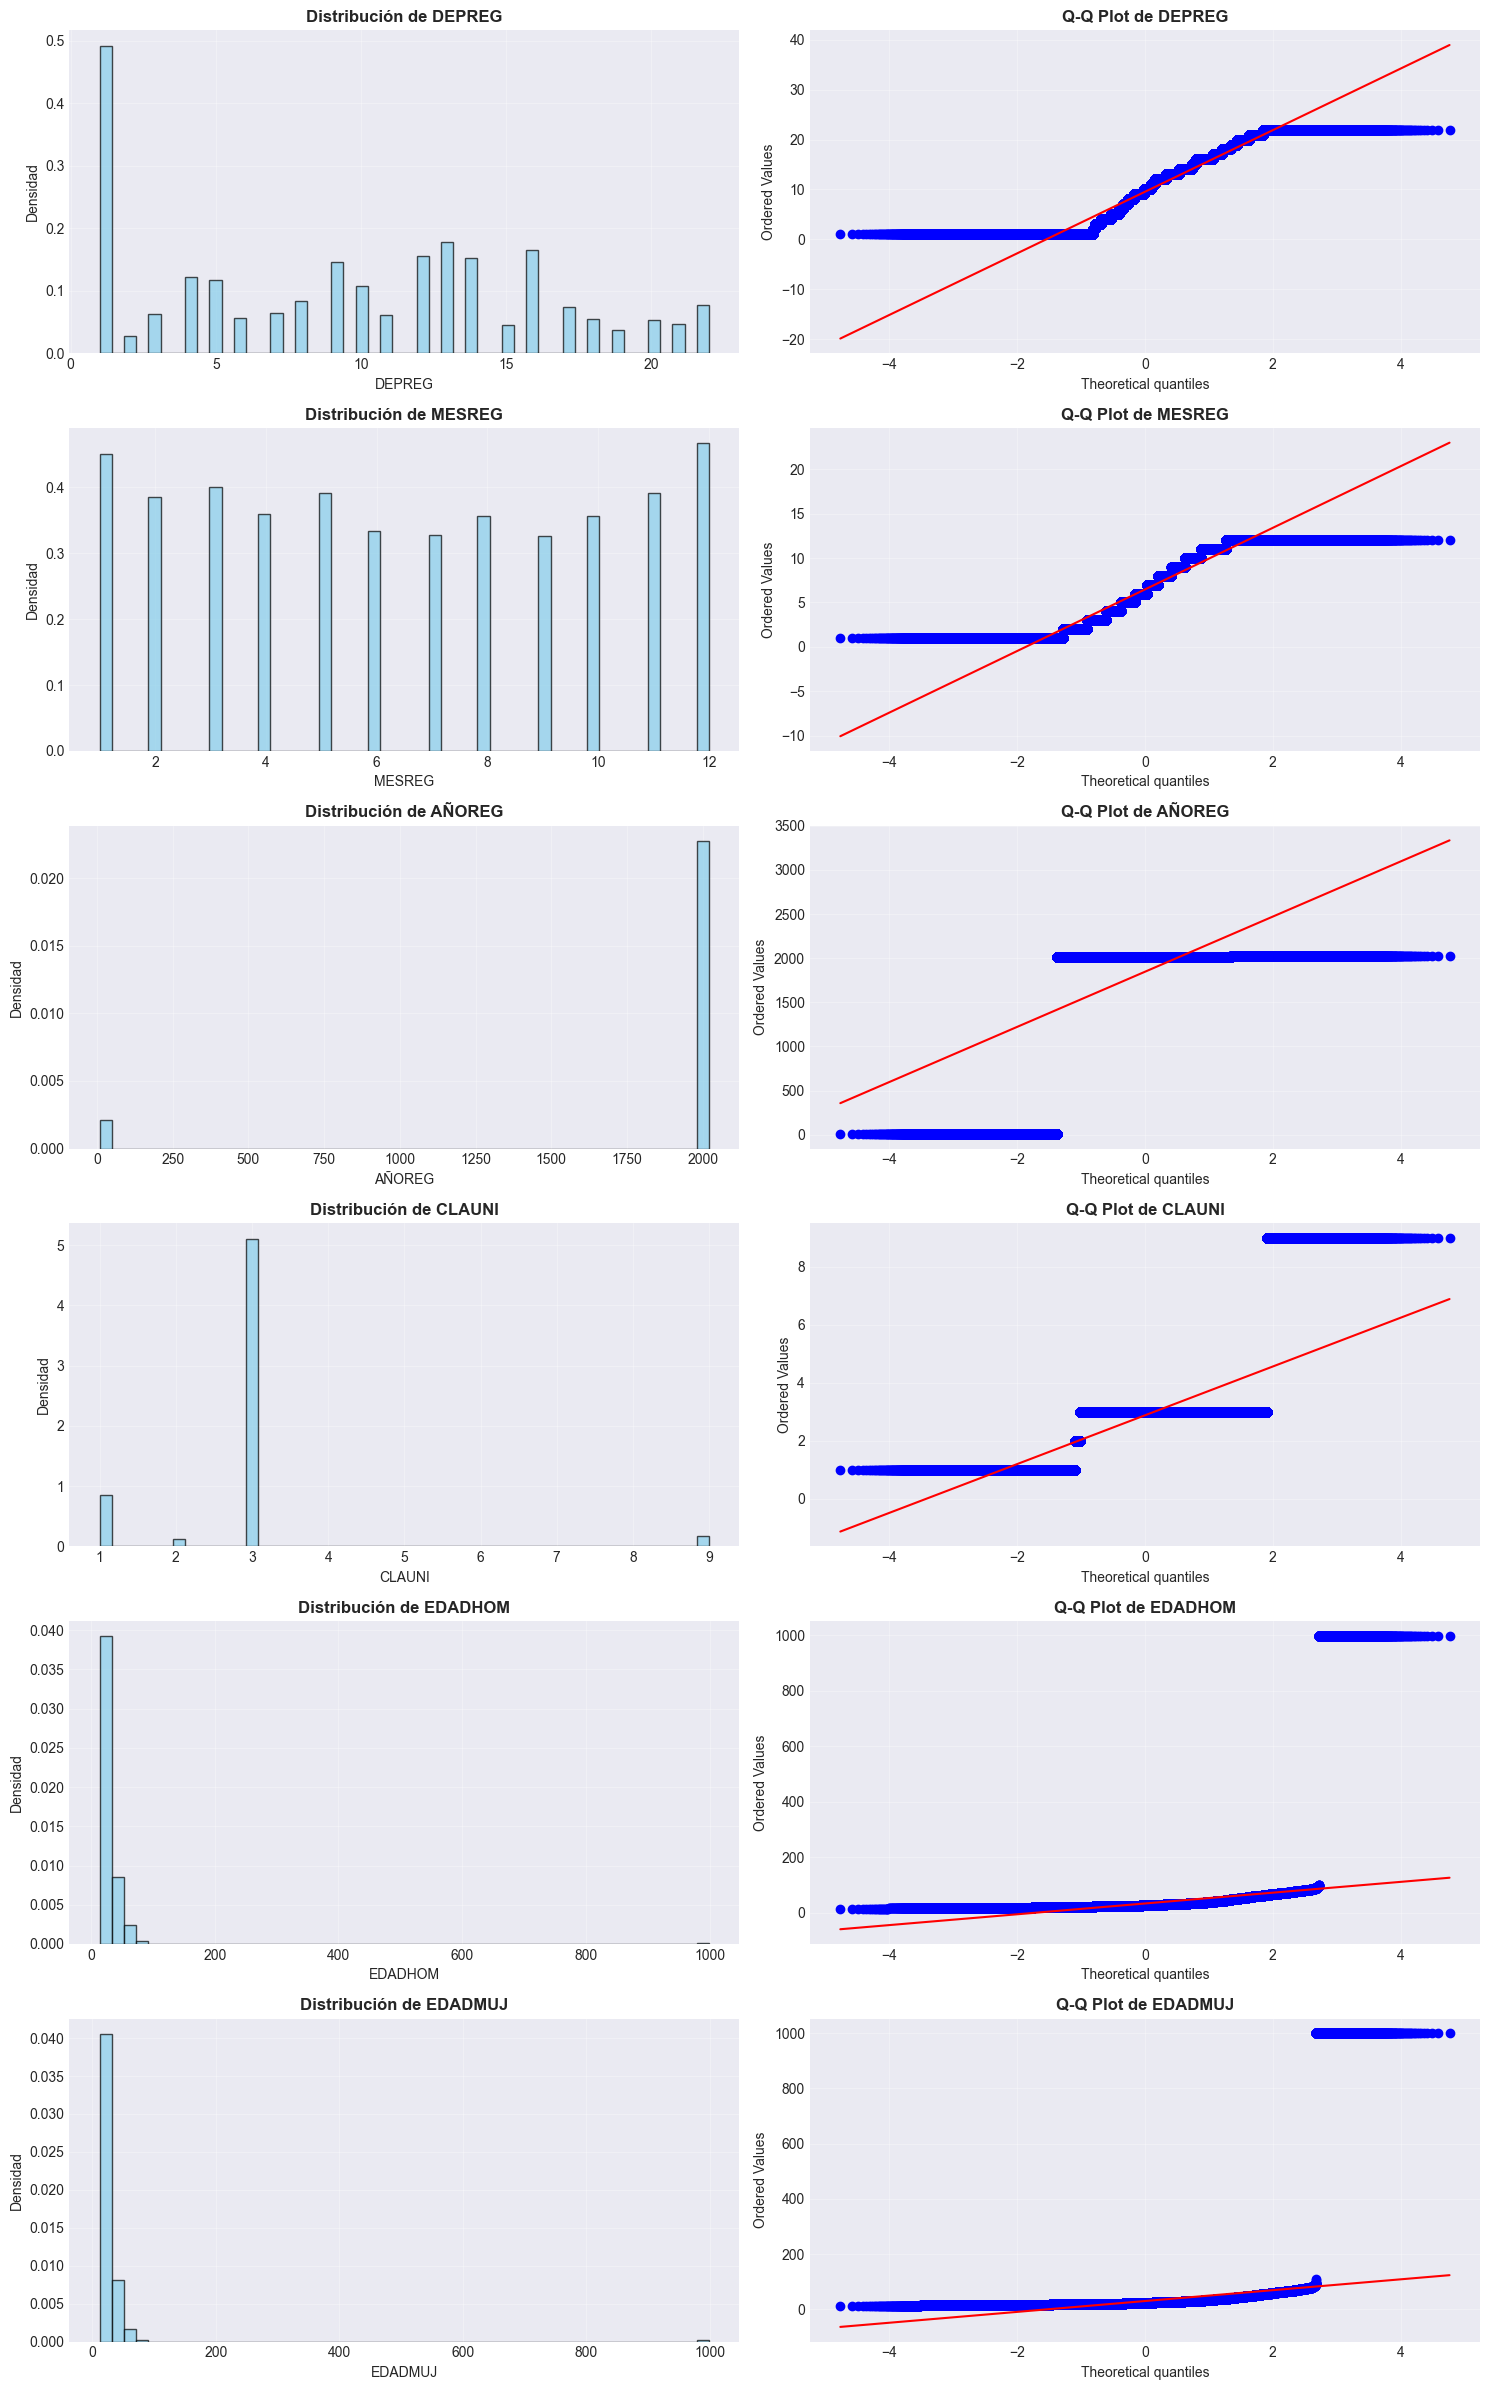

In [9]:
# Visualización de distribuciones para las variables numéricas más importantes
# Seleccionar las primeras variables numéricas para visualizar (ajustar según las variables disponibles)
vars_a_visualizar = variables_numericas[:min(6, len(variables_numericas))]

if len(vars_a_visualizar) > 0:
    fig, axes = plt.subplots(len(vars_a_visualizar), 2, figsize=(15, 4*len(vars_a_visualizar)))
    
    if len(vars_a_visualizar) == 1:
        axes = axes.reshape(1, -1)
    
    for i, var in enumerate(vars_a_visualizar):
        datos = df_matrimonios[var].dropna()
        
        # Histograma con curva de densidad
        axes[i, 0].hist(datos, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i, 0].set_title(f'Distribución de {var}', fontsize=12, fontweight='bold')
        axes[i, 0].set_xlabel(var)
        axes[i, 0].set_ylabel('Densidad')
        axes[i, 0].grid(True, alpha=0.3)
        
        # Q-Q Plot
        stats.probplot(datos, dist="norm", plot=axes[i, 1])
        axes[i, 1].set_title(f'Q-Q Plot de {var}', fontsize=12, fontweight='bold')
        axes[i, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No hay variables numéricas para visualizar")

## B.2 Variables Categóricas: Tablas de Frecuencia

In [10]:
# Identificar variables categóricas
variables_categoricas = df_matrimonios.select_dtypes(include=['object']).columns.tolist()

print("="*80)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*80)
print(f"\nVariables categóricas a analizar: {len(variables_categoricas)}\n")

# Crear función para generar tabla de frecuencias
def tabla_frecuencias(df, columna, top_n=10):
    """Genera tabla de frecuencias para una variable categórica"""
    freq = df[columna].value_counts()
    freq_rel = df[columna].value_counts(normalize=True) * 100
    
    tabla = pd.DataFrame({
        'Categoría': freq.index,
        'Frecuencia': freq.values,
        'Porcentaje': freq_rel.values.round(2)
    }).head(top_n)
    
    return tabla, len(freq)

# Diccionario para almacenar las tablas de frecuencia
tablas_frecuencia = {}

ANÁLISIS DE VARIABLES CATEGÓRICAS

Variables categóricas a analizar: 10



In [11]:
# Generar tablas de frecuencia para todas las variables categóricas
for var in variables_categoricas:
    print(f"\n{'='*80}")
    print(f"VARIABLE: {var}")
    print("="*80)
    
    tabla, total_categorias = tabla_frecuencias(df_matrimonios, var, top_n=15)
    tablas_frecuencia[var] = tabla
    
    print(f"\nTotal de categorías únicas: {total_categorias}")
    print(f"Valores nulos: {df_matrimonios[var].isnull().sum()} ({(df_matrimonios[var].isnull().sum()/len(df_matrimonios)*100):.2f}%)")
    print(f"\nTop 15 categorías más frecuentes:")
    print(tabla.to_string(index=False))
    
    # Visualización para variables con pocas categorías (menos de 20)
    if total_categorias <= 20 and total_categorias > 0:
        plt.figure(figsize=(12, 6))
        freq_data = df_matrimonios[var].value_counts().head(15)
        plt.bar(range(len(freq_data)), freq_data.values, color='steelblue', edgecolor='black')
        plt.xticks(range(len(freq_data)), freq_data.index, rotation=45, ha='right')
        plt.xlabel(var)
        plt.ylabel('Frecuencia')
        plt.title(f'Distribución de {var}', fontsize=14, fontweight='bold')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()


VARIABLE: MUPREG

Total de categorías únicas: 340
Valores nulos: 151410 (17.06%)

Top 15 categorías más frecuentes:
Categoría  Frecuencia  Porcentaje
     0101       78141       10.62
     0115       13200        1.79
     0901       10694        1.45
     1601        9791        1.33
     1609        9488        1.29
     0108        8929        1.21
     0110        8824        1.20
     1301        8703        1.18
     0801        8289        1.13
     0401        7272        0.99
     2101        7258        0.99
     1406        7014        0.95
     0920        7006        0.95
     0805        6959        0.95
     2201        6839        0.93

VARIABLE: OCUHOM

Total de categorías únicas: 458
Valores nulos: 741135 (83.51%)

Top 15 categorías más frecuentes:
Categoría  Frecuencia  Porcentaje
     6111       29031       19.84
   6111.0       22165       15.14
   9712.0       18191       12.43
     9712       18036       12.32
     9211        6400        4.37
   9211.0        6

---
# INCISO C: Cruce de Variables Clave

Análisis de relaciones entre variables importantes para comprender factores de riesgo en matrimonios que puedan relacionarse con violencia intrafamiliar.

In [12]:
# Identificar las columnas disponibles que son relevantes para el análisis
print("="*80)
print("IDENTIFICACIÓN DE VARIABLES CLAVE")
print("="*80)
print("\nColumnas disponibles en el dataset:")
print(df_matrimonios.columns.tolist())

# Buscar columnas relacionadas con factores de riesgo
palabras_clave = ['edad', 'educacion', 'escolaridad', 'estado_civil', 'civil', 
                  'departamento', 'municipio', 'ocupacion', 'profesion',
                  'alfabetismo', 'etnia', 'pueblo']

columnas_relevantes = []
for col in df_matrimonios.columns:
    col_lower = col.lower()
    if any(palabra in col_lower for palabra in palabras_clave):
        columnas_relevantes.append(col)

print(f"\n{'='*80}")
print("VARIABLES IDENTIFICADAS COMO RELEVANTES PARA EL ANÁLISIS:")
print("="*80)
for col in columnas_relevantes:
    print(f"  • {col}")

IDENTIFICACIÓN DE VARIABLES CLAVE

Columnas disponibles en el dataset:
['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'CLAUNI', 'EDADHOM', 'EDADMUJ', 'GETHOM', 'GETMUJ', 'NACHOM', 'NACMUJ', 'OCUHOM', 'OCUMUJ', 'NUPHON', 'NUPMUJ', 'DEPOCU', 'MUPOCU', 'MESOCU', 'AÑOOCU', 'AREAG', 'año', 'Depreg', 'mupreg', 'Mesreg', 'Añoreg', 'Clauni', 'Edadhom', 'Edadmuj', 'Gethom', 'Getmuj', 'Nachom', 'Nacmuj', 'Eschom', 'Escmuj', 'Ocuhom', 'Ocumuj', 'Depocu', 'mupocu', 'Diaocu', 'Mesocu', 'Añoocu', 'Areag', 'ESCHOM', 'ESCMUJ', 'DIAOCU', 'PUEHOM', 'PUEMUJ', 'CIUOHOM', 'CIUOMUJ', 'AREAGOCU', 'NUNUHO', 'NUNUMU']

VARIABLES IDENTIFICADAS COMO RELEVANTES PARA EL ANÁLISIS:
  • EDADHOM
  • EDADMUJ
  • Edadhom
  • Edadmuj


## C.1 Análisis Temporal: Evolución de Matrimonios por Año

EVOLUCIÓN TEMPORAL DE MATRIMONIOS
año
2009    62104
2010    73124
2011    78286
2012    84253
2013    80750
2014    79496
2015    79177
2016    69613
2017    71597
2018    74777
2019    76928
2020    57387
Name: count, dtype: int64


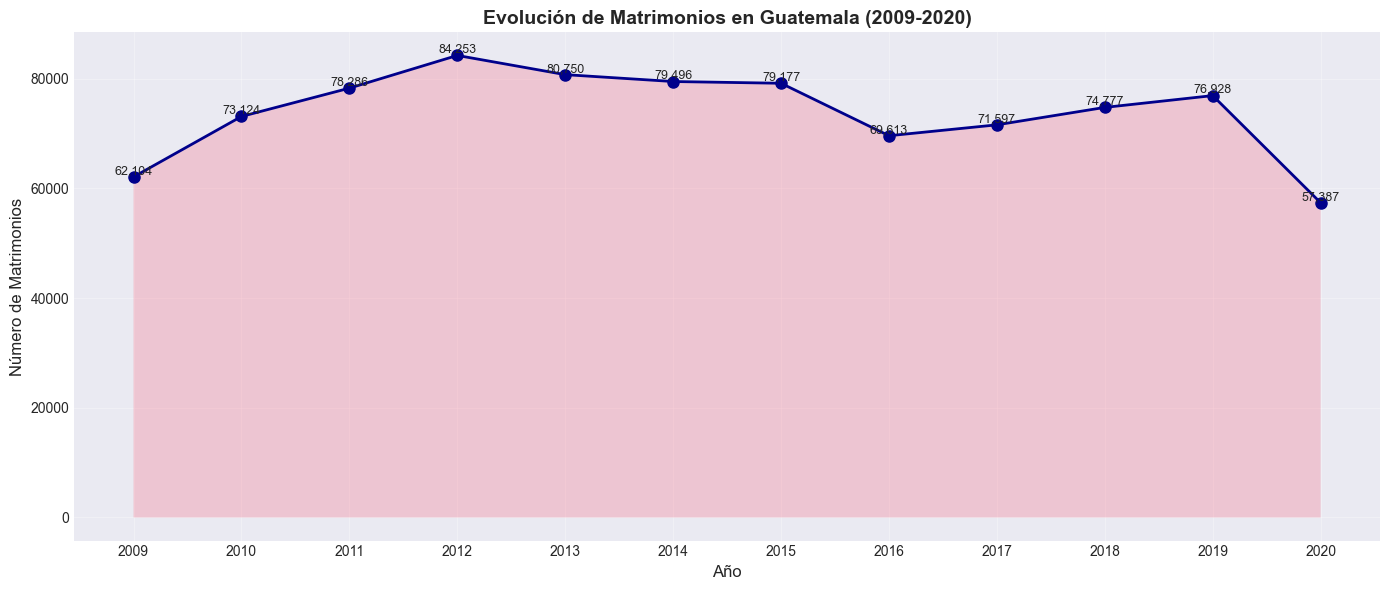


ANÁLISIS DE TENDENCIA
Cambio total 2009-2020: -7.60%
Promedio anual de matrimonios: 73,958


In [13]:
# Evolución temporal de matrimonios
matrimonios_por_año = df_matrimonios['año'].value_counts().sort_index()

print("="*80)
print("EVOLUCIÓN TEMPORAL DE MATRIMONIOS")
print("="*80)
print(matrimonios_por_año)

# Visualización
plt.figure(figsize=(14, 6))
plt.plot(matrimonios_por_año.index, matrimonios_por_año.values, marker='o', 
         linewidth=2, markersize=8, color='darkblue')
plt.fill_between(matrimonios_por_año.index, matrimonios_por_año.values, alpha=0.3)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Matrimonios', fontsize=12)
plt.title('Evolución de Matrimonios en Guatemala (2009-2020)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(matrimonios_por_año.index)

# Agregar valores en cada punto
for x, y in zip(matrimonios_por_año.index, matrimonios_por_año.values):
    plt.text(x, y, f'{y:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Calcular tasa de cambio
print(f"\n{'='*80}")
print("ANÁLISIS DE TENDENCIA")
print("="*80)
cambio_total = ((matrimonios_por_año.iloc[-1] - matrimonios_por_año.iloc[0]) / matrimonios_por_año.iloc[0] * 100)
print(f"Cambio total 2009-2020: {cambio_total:.2f}%")
print(f"Promedio anual de matrimonios: {matrimonios_por_año.mean():,.0f}")

## C.2 Análisis de Edad: Diferencias de Edad entre Contrayentes

La diferencia de edad puede ser un factor de riesgo en relaciones con potencial de violencia intrafamiliar.

ANÁLISIS DE EDAD EN MATRIMONIOS

Columnas de edad encontradas: ['EDADHOM', 'EDADMUJ', 'Edadhom', 'Edadmuj']

Estadísticas de edad:
  EDADHOM:
    - Media: 32.57 años
    - Mediana: 26.00 años
    - Rango: 14 - 999 años

  EDADMUJ:
    - Media: 30.06 años
    - Mediana: 23.00 años
    - Rango: 12 - 999 años

  Diferencia de edad:
    - Media: 8.16 años
    - Mediana: 3.00 años


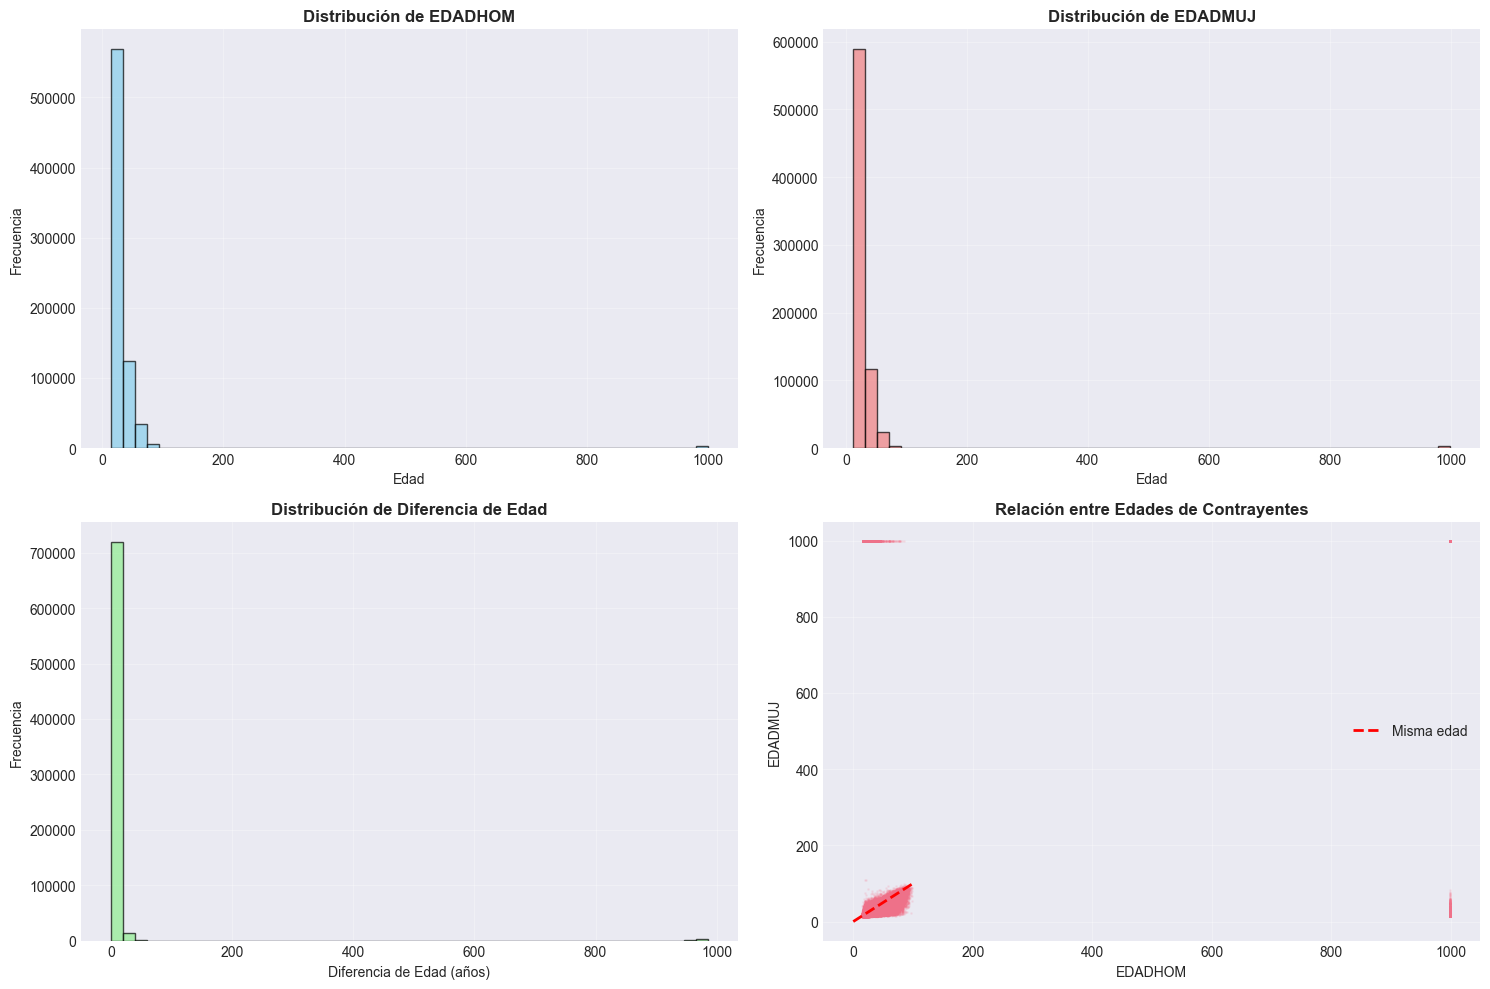


ANÁLISIS DE DIFERENCIAS DE EDAD (FACTOR DE RIESGO)

Distribución de diferencias de edad:
categoria_diferencia_edad
0-5 años      458927
6-10 años     140427
11-15 años     40246
16-20 años     14074
>20 años       11813
Name: count, dtype: int64

Matrimonios con diferencia >10 años: 68,879 (7.76%)
Matrimonios con diferencia >20 años: 14,559 (1.64%)


In [14]:
# Buscar columnas de edad
columnas_edad = [col for col in df_matrimonios.columns if 'edad' in col.lower()]
print("="*80)
print("ANÁLISIS DE EDAD EN MATRIMONIOS")
print("="*80)
print(f"\nColumnas de edad encontradas: {columnas_edad}")

if len(columnas_edad) >= 2:
    # Asumiendo que hay columnas para edad del esposo y edad de la esposa
    # Ajustar nombres según lo que se encuentre en los datos reales
    edad_col1 = columnas_edad[0]
    edad_col2 = columnas_edad[1] if len(columnas_edad) > 1 else columnas_edad[0]
    
    # Calcular diferencia de edad
    df_matrimonios['diferencia_edad'] = abs(df_matrimonios[edad_col1] - df_matrimonios[edad_col2])
    
    print(f"\nEstadísticas de edad:")
    print(f"  {edad_col1}:")
    print(f"    - Media: {df_matrimonios[edad_col1].mean():.2f} años")
    print(f"    - Mediana: {df_matrimonios[edad_col1].median():.2f} años")
    print(f"    - Rango: {df_matrimonios[edad_col1].min():.0f} - {df_matrimonios[edad_col1].max():.0f} años")
    
    print(f"\n  {edad_col2}:")
    print(f"    - Media: {df_matrimonios[edad_col2].mean():.2f} años")
    print(f"    - Mediana: {df_matrimonios[edad_col2].median():.2f} años")
    print(f"    - Rango: {df_matrimonios[edad_col2].min():.0f} - {df_matrimonios[edad_col2].max():.0f} años")
    
    print(f"\n  Diferencia de edad:")
    print(f"    - Media: {df_matrimonios['diferencia_edad'].mean():.2f} años")
    print(f"    - Mediana: {df_matrimonios['diferencia_edad'].median():.2f} años")
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Histogramas de edad
    axes[0, 0].hist(df_matrimonios[edad_col1].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_title(f'Distribución de {edad_col1}', fontweight='bold')
    axes[0, 0].set_xlabel('Edad')
    axes[0, 0].set_ylabel('Frecuencia')
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].hist(df_matrimonios[edad_col2].dropna(), bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[0, 1].set_title(f'Distribución de {edad_col2}', fontweight='bold')
    axes[0, 1].set_xlabel('Edad')
    axes[0, 1].set_ylabel('Frecuencia')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Diferencia de edad
    axes[1, 0].hist(df_matrimonios['diferencia_edad'].dropna(), bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1, 0].set_title('Distribución de Diferencia de Edad', fontweight='bold')
    axes[1, 0].set_xlabel('Diferencia de Edad (años)')
    axes[1, 0].set_ylabel('Frecuencia')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Scatter plot de edades
    axes[1, 1].scatter(df_matrimonios[edad_col1], df_matrimonios[edad_col2], alpha=0.1, s=1)
    axes[1, 1].set_title('Relación entre Edades de Contrayentes', fontweight='bold')
    axes[1, 1].set_xlabel(edad_col1)
    axes[1, 1].set_ylabel(edad_col2)
    axes[1, 1].plot([0, 100], [0, 100], 'r--', label='Misma edad', linewidth=2)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de grupos de riesgo por diferencia de edad
    print(f"\n{'='*80}")
    print("ANÁLISIS DE DIFERENCIAS DE EDAD (FACTOR DE RIESGO)")
    print("="*80)
    
    # Categorizar diferencias de edad
    df_matrimonios['categoria_diferencia_edad'] = pd.cut(df_matrimonios['diferencia_edad'], 
                                                          bins=[0, 5, 10, 15, 20, 100],
                                                          labels=['0-5 años', '6-10 años', '11-15 años', '16-20 años', '>20 años'])
    
    tabla_diferencia = df_matrimonios['categoria_diferencia_edad'].value_counts().sort_index()
    print("\nDistribución de diferencias de edad:")
    print(tabla_diferencia)
    print(f"\nMatrimonios con diferencia >10 años: {(df_matrimonios['diferencia_edad'] > 10).sum():,} ({(df_matrimonios['diferencia_edad'] > 10).sum()/len(df_matrimonios)*100:.2f}%)")
    print(f"Matrimonios con diferencia >20 años: {(df_matrimonios['diferencia_edad'] > 20).sum():,} ({(df_matrimonios['diferencia_edad'] > 20).sum()/len(df_matrimonios)*100:.2f}%)")
    
else:
    print("\nNo se encontraron suficientes columnas de edad para el análisis.")

## C.3 Distribución Geográfica

Análisis de matrimonios por departamento y municipio para identificar patrones regionales.

ANÁLISIS GEOGRÁFICO DE MATRIMONIOS

DISTRIBUCIÓN DE MATRIMONIOS POR DEPARTAMENTO
Departamento
Guatemala         152114
Huehuetenango      54889
Alta Verapaz       51302
San Marcos         48338
Quiché             47205
Quetzaltenango     45176
Chimaltenango      37803
Escuintla          36087
Suchitepéquez      33461
Totonicapán        25983
Jutiapa            23823
Petén              22790
Sololá             19897
Sacatepéquez       19381
Retalhuleu         18768
Santa Rosa         17559
Izabal             16721
Chiquimula         16262
Jalapa             14637
Baja Verapaz       13783
Zacapa             11733
El Progreso         8370
Name: count, dtype: int64


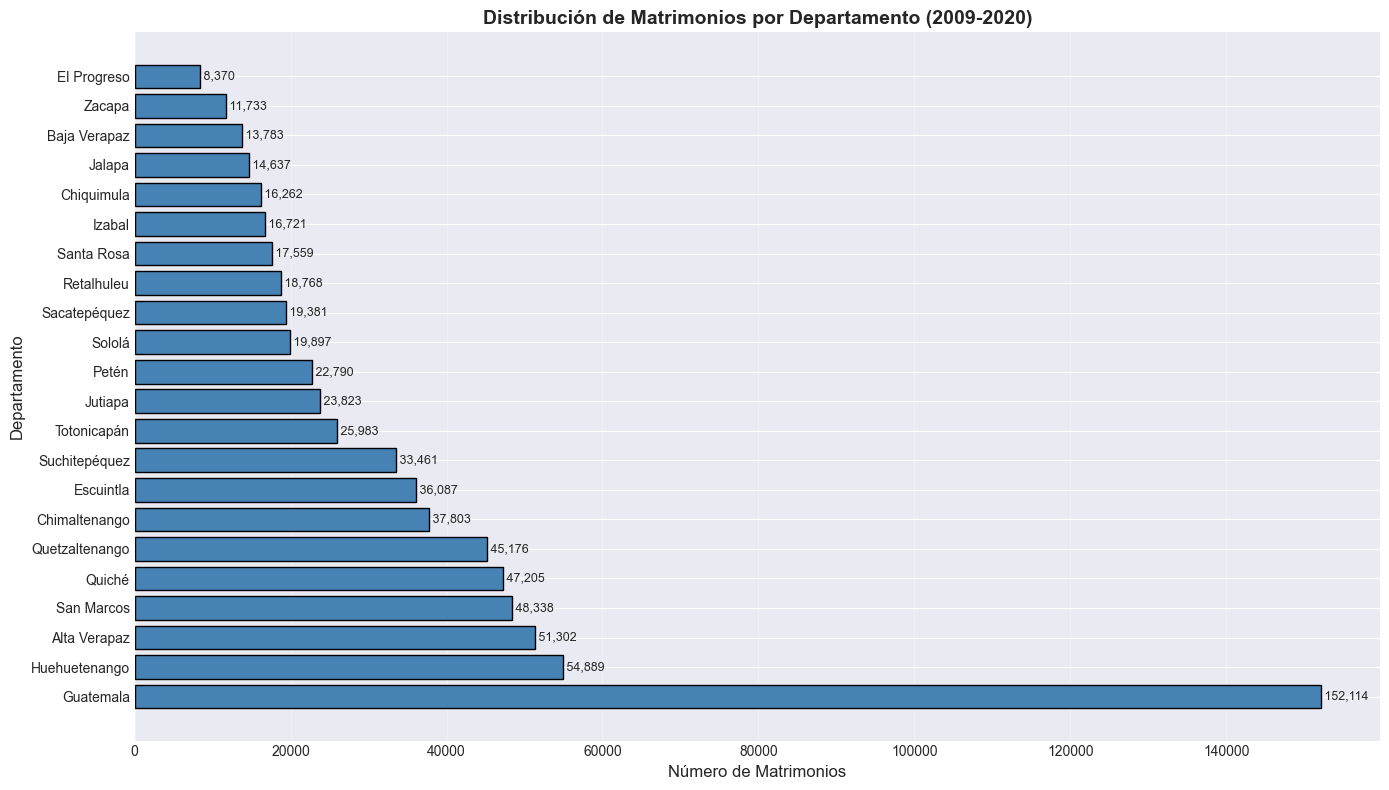


ANÁLISIS DE CONCENTRACIÓN GEOGRÁFICA
Top 5 departamentos representan: 48.07% del total
Top 10 departamentos representan: 72.32% del total


In [16]:
# Análisis por departamento usando código DEPREG
print("="*80)
print("ANÁLISIS GEOGRÁFICO DE MATRIMONIOS")
print("="*80)

# Mapeo de códigos de departamento (según estándares del INE)
departamentos_map = {
    1: 'Guatemala', 2: 'El Progreso', 3: 'Sacatepéquez', 4: 'Chimaltenango',
    5: 'Escuintla', 6: 'Santa Rosa', 7: 'Sololá', 8: 'Totonicapán',
    9: 'Quetzaltenango', 10: 'Suchitepéquez', 11: 'Retalhuleu', 12: 'San Marcos',
    13: 'Huehuetenango', 14: 'Quiché', 15: 'Baja Verapaz', 16: 'Alta Verapaz',
    17: 'Petén', 18: 'Izabal', 19: 'Zacapa', 20: 'Chiquimula',
    21: 'Jalapa', 22: 'Jutiapa'
}

# Usar DEPREG o Depreg para análisis geográfico
col_depto = 'DEPREG' if 'DEPREG' in df_matrimonios.columns else 'Depreg'

if col_depto in df_matrimonios.columns:
    # Crear columna con nombre de departamento
    df_matrimonios['Departamento'] = df_matrimonios[col_depto].map(departamentos_map)
    
    matrimonios_depto = df_matrimonios['Departamento'].value_counts()
    
    print(f"\n{'='*80}")
    print(f"DISTRIBUCIÓN DE MATRIMONIOS POR DEPARTAMENTO")
    print("="*80)
    print(matrimonios_depto)
    
    # Visualización
    plt.figure(figsize=(14, 8))
    plt.barh(range(len(matrimonios_depto)), matrimonios_depto.values, color='steelblue', edgecolor='black')
    plt.yticks(range(len(matrimonios_depto)), matrimonios_depto.index)
    plt.xlabel('Número de Matrimonios', fontsize=12)
    plt.ylabel('Departamento', fontsize=12)
    plt.title('Distribución de Matrimonios por Departamento (2009-2020)', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Agregar valores en las barras
    for i, v in enumerate(matrimonios_depto.values):
        plt.text(v, i, f' {v:,}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de concentración
    total_matrimonios = matrimonios_depto.sum()
    print(f"\n{'='*80}")
    print("ANÁLISIS DE CONCENTRACIÓN GEOGRÁFICA")
    print("="*80)
    print(f"Top 5 departamentos representan: {matrimonios_depto.head(5).sum()/total_matrimonios*100:.2f}% del total")
    print(f"Top 10 departamentos representan: {matrimonios_depto.head(10).sum()/total_matrimonios*100:.2f}% del total")
    
else:
    print("\nNo se encontró la columna de departamento.")

## C.4 Cruces de Variables: Educación, Edad y Ubicación

Análisis de relaciones entre variables sociodemográficas clave.

CRUCES DE VARIABLES CLAVE

Columnas de educación encontradas: ['Eschom', 'Escmuj', 'ESCHOM', 'ESCMUJ']
Columnas de edad: ['EDADHOM', 'EDADMUJ', 'Edadhom', 'Edadmuj']

CRUCE: EDAD vs DEPARTAMENTO

Distribución de edad de hombres por departamento (Top 10):
grupo_edad_hom    <20  20-30  31-40  41-50    >50
Departamento                                     
Alta Verapaz    14.25  60.48  16.58   3.96   4.73
Chimaltenango   19.62  60.87  13.16   3.18   3.18
Escuintla       11.27  52.86  17.92   7.65  10.30
Guatemala        9.39  55.02  22.24   6.83   6.53
Huehuetenango   18.68  51.03  16.81   5.99   7.49
Quetzaltenango  19.14  54.65  15.29   5.15   5.77
Quiché          21.93  52.84  14.09   5.27   5.87
San Marcos      16.62  51.38  16.74   6.45   8.81
Suchitepéquez   18.60  56.43  14.25   4.84   5.89
Totonicapán     25.36  54.50  11.89   3.80   4.44


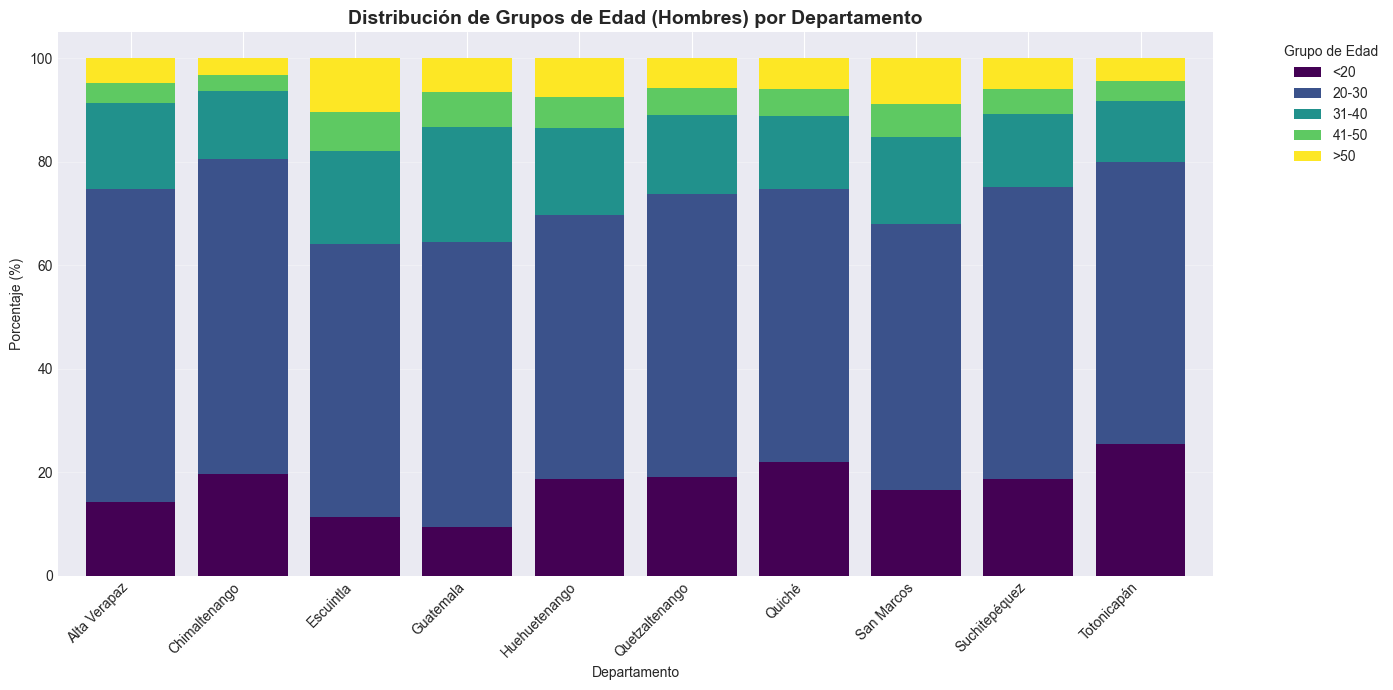


EVOLUCIÓN TEMPORAL POR DEPARTAMENTO

Número de matrimonios por año en top 5 departamentos:
Departamento  Alta Verapaz  Guatemala  Huehuetenango  Quiché  San Marcos
año                                                                     
2009                  4300      11824           5276    3837        4059
2012                  6139      17048           6713    5468        5875
2013                  5047      17540           6087    5222        5307
2014                  5151      17232           5903    5289        5111
2015                  4813      16766           6052    5439        5177
2016                  4211      16042           5112    4104        4904
2017                  5021      15447           5075    4336        4702
2018                  5601      15418           5289    4681        4477
2019                  6244      14477           5401    4981        4696
2020                  4775      10320           3981    3848        4030


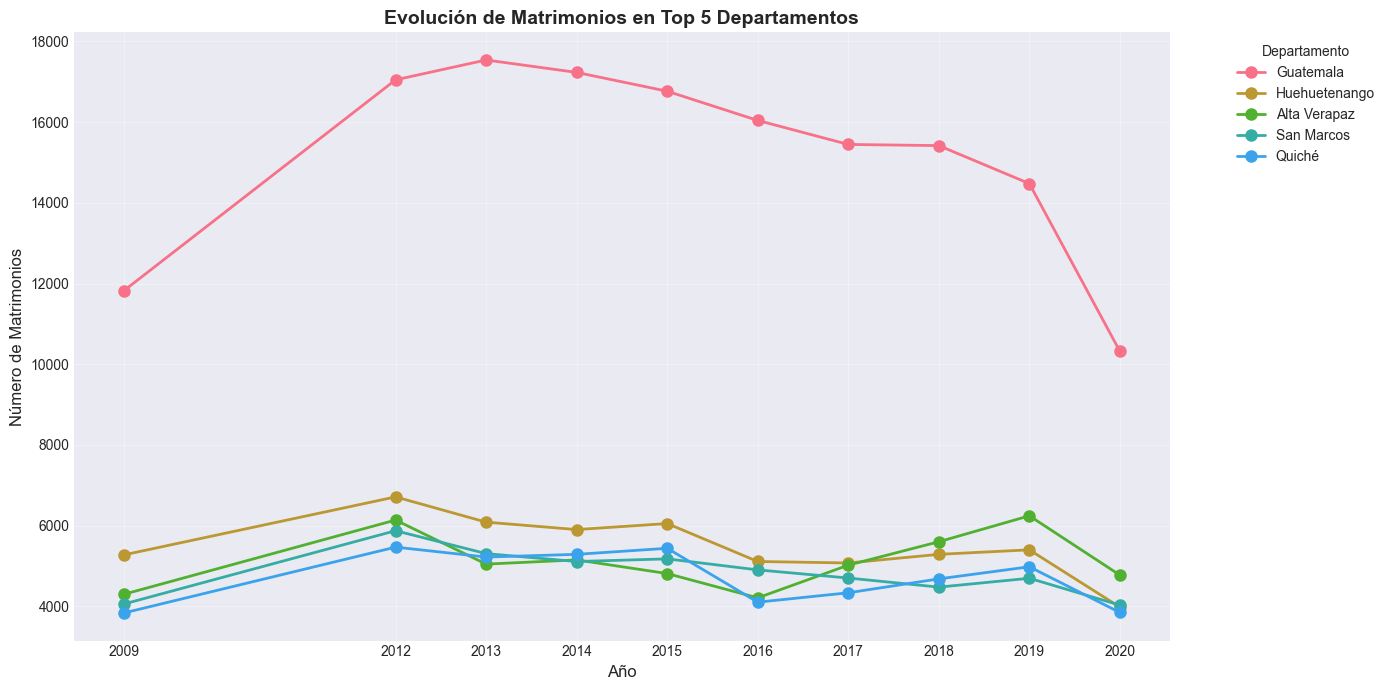


DIFERENCIA DE EDAD PROMEDIO POR DEPARTAMENTO

Top 10 departamentos con mayor diferencia de edad promedio:
                mean  median
Departamento                
Suchitepéquez  11.88     3.0
Jutiapa        11.76     4.0
Santa Rosa     10.58     4.0
Retalhuleu     10.30     3.0
Izabal         10.01     4.0
Totonicapán     9.34     3.0
Chiquimula      9.21     4.0
Petén           9.19     4.0
Alta Verapaz    9.02     4.0
Zacapa          8.78     4.0


In [18]:
# Buscar variables de educación (ESCHOM, ESCMUJ)
columnas_educacion = [col for col in df_matrimonios.columns if 'ESC' in col.upper() and col.upper() in ['ESCHOM', 'ESCMUJ', 'Eschom', 'Escmuj']]
print("="*80)
print("CRUCES DE VARIABLES CLAVE")
print("="*80)
print(f"\nColumnas de educación encontradas: {columnas_educacion}")
print(f"Columnas de edad: {columnas_edad}")

# Análisis multivariado según las variables disponibles
if len(columnas_edad) >= 2 and 'Departamento' in df_matrimonios.columns:
    
    print(f"\n{'='*80}")
    print(f"CRUCE: EDAD vs DEPARTAMENTO")
    print("="*80)
    
    # Crear categorías de edad para hombres
    df_matrimonios['grupo_edad_hom'] = pd.cut(df_matrimonios['EDADHOM'], 
                                          bins=[0, 20, 30, 40, 50, 100],
                                          labels=['<20', '20-30', '31-40', '41-50', '>50'])
    
    # Top 10 departamentos
    top_deptos = df_matrimonios['Departamento'].value_counts().head(10).index
    
    # Tabla de contingencia - porcentaje por departamento
    tabla_cruzada = pd.crosstab(df_matrimonios[df_matrimonios['Departamento'].isin(top_deptos)]['Departamento'], 
                                df_matrimonios['grupo_edad_hom'], 
                                normalize='index') * 100
    
    print("\nDistribución de edad de hombres por departamento (Top 10):")
    print(tabla_cruzada.round(2))
    
    # Visualización del cruce
    tabla_cruzada.plot(kind='bar', figsize=(14, 7), stacked=True, width=0.8, colormap='viridis')
    plt.title(f'Distribución de Grupos de Edad (Hombres) por Departamento', fontsize=14, fontweight='bold')
    plt.xlabel('Departamento')
    plt.ylabel('Porcentaje (%)')
    plt.legend(title='Grupo de Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Análisis de tendencias por año y departamento
if 'año' in df_matrimonios.columns and 'Departamento' in df_matrimonios.columns:
    
    print(f"\n{'='*80}")
    print(f"EVOLUCIÓN TEMPORAL POR DEPARTAMENTO")
    print("="*80)
    
    # Top 5 departamentos
    top_5_deptos = df_matrimonios['Departamento'].value_counts().head(5).index
    
    # Crear tabla pivote
    tendencia_depto = df_matrimonios[df_matrimonios['Departamento'].isin(top_5_deptos)].pivot_table(
        index='año',
        columns='Departamento',
        values='EDADHOM',  # Usar edad para contar
        aggfunc='count'
    )
    
    print("\nNúmero de matrimonios por año en top 5 departamentos:")
    print(tendencia_depto)
    
    # Visualización
    plt.figure(figsize=(14, 7))
    for depto in top_5_deptos:
        plt.plot(tendencia_depto.index, tendencia_depto[depto], marker='o', linewidth=2, label=depto, markersize=8)
    
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Número de Matrimonios', fontsize=12)
    plt.title(f'Evolución de Matrimonios en Top 5 Departamentos', fontsize=14, fontweight='bold')
    plt.legend(title='Departamento', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(tendencia_depto.index)
    plt.tight_layout()
    plt.show()
    
    # Análisis de diferencia de edad por departamento
    if 'diferencia_edad' in df_matrimonios.columns:
        print(f"\n{'='*80}")
        print(f"DIFERENCIA DE EDAD PROMEDIO POR DEPARTAMENTO")
        print("="*80)
        
        dif_edad_depto = df_matrimonios.groupby('Departamento')['diferencia_edad'].agg(['mean', 'median']).sort_values('mean', ascending=False)
        print("\nTop 10 departamentos con mayor diferencia de edad promedio:")
        print(dif_edad_depto.head(10).round(2))

## C.5 Identificación de Factores de Riesgo

Resumen de factores que podrían relacionarse con violencia intrafamiliar según la literatura:

In [19]:
print("="*80)
print("FACTORES DE RIESGO IDENTIFICADOS EN MATRIMONIOS")
print("="*80)

factores_riesgo = []

# 1. Matrimonios con gran diferencia de edad
if 'diferencia_edad' in df_matrimonios.columns:
    riesgo_edad = (df_matrimonios['diferencia_edad'] > 10).sum()
    porcentaje_edad = (riesgo_edad / len(df_matrimonios) * 100)
    factores_riesgo.append({
        'Factor': 'Gran diferencia de edad (>10 años)',
        'Casos': riesgo_edad,
        'Porcentaje': f'{porcentaje_edad:.2f}%',
        'Interpretación': 'Diferencias significativas de edad pueden indicar desbalances de poder'
    })

# 2. Matrimonios a edad temprana
if len(columnas_edad) > 0:
    edad_col = columnas_edad[0]
    matrimonios_jovenes = (df_matrimonios[edad_col] < 18).sum()
    porcentaje_jovenes = (matrimonios_jovenes / len(df_matrimonios) * 100)
    factores_riesgo.append({
        'Factor': 'Matrimonio a edad temprana (<18 años)',
        'Casos': matrimonios_jovenes,
        'Porcentaje': f'{porcentaje_jovenes:.2f}%',
        'Interpretación': 'Matrimonios tempranos aumentan riesgo de violencia y abandono'
    })
    
    # Distribución por grupos de edad
    grupos_edad_riesgo = df_matrimonios[edad_col].apply(
        lambda x: 'Menor de edad' if x < 18 else 'Adulto joven (18-25)' if x <= 25 else 'Adulto (26+)'
    ).value_counts()
    
    print(f"\nDistribución por grupos de edad ({edad_col}):")
    for grupo, cantidad in grupos_edad_riesgo.items():
        print(f"  • {grupo}: {cantidad:,} ({cantidad/len(df_matrimonios)*100:.2f}%)")

# 3. Análisis de educación como factor protector
if len(columnas_educacion) > 0:
    col_ed = columnas_educacion[0]
    print(f"\n{'='*80}")
    print(f"ANÁLISIS DE EDUCACIÓN: {col_ed}")
    print("="*80)
    dist_educacion = df_matrimonios[col_ed].value_counts(normalize=True) * 100
    print("\nDistribución de nivel educativo:")
    for nivel, porcentaje in dist_educacion.head(10).items():
        print(f"  • {nivel}: {porcentaje:.2f}%")

# Crear DataFrame de factores de riesgo
if factores_riesgo:
    df_factores = pd.DataFrame(factores_riesgo)
    print(f"\n{'='*80}")
    print("RESUMEN DE FACTORES DE RIESGO")
    print("="*80)
    print(df_factores.to_string(index=False))

# Análisis de patrones geográficos de riesgo
if len(columnas_geo) > 0 and 'diferencia_edad' in df_matrimonios.columns:
    col_depto = [col for col in columnas_geo if 'departamento' in col.lower()][0] if any('departamento' in col.lower() for col in columnas_geo) else columnas_geo[0]
    
    print(f"\n{'='*80}")
    print(f"DEPARTAMENTOS CON MAYOR PROMEDIO DE DIFERENCIA DE EDAD")
    print("="*80)
    
    diferencia_por_depto = df_matrimonios.groupby(col_depto)['diferencia_edad'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False).head(10)
    diferencia_por_depto.columns = ['Promedio_Dif_Edad', 'Mediana_Dif_Edad', 'Num_Matrimonios']
    print(diferencia_por_depto.round(2))

FACTORES DE RIESGO IDENTIFICADOS EN MATRIMONIOS

Distribución por grupos de edad (EDADHOM):
  • Adulto (26+): 537,355 (60.55%)
  • Adulto joven (18-25): 340,404 (38.36%)
  • Menor de edad: 9,733 (1.10%)

ANÁLISIS DE EDUCACIÓN: Eschom

Distribución de nivel educativo:
  • 2.0: 27.45%
  • 1.0: 26.92%
  • 9.0: 19.94%
  • 4.0: 14.51%
  • 3.0: 8.88%
  • 5.0: 2.30%

RESUMEN DE FACTORES DE RIESGO
                               Factor  Casos Porcentaje                                                         Interpretación
   Gran diferencia de edad (>10 años)  68879      7.76% Diferencias significativas de edad pueden indicar desbalances de poder
Matrimonio a edad temprana (<18 años)   9733      1.10%          Matrimonios tempranos aumentan riesgo de violencia y abandono


---
# CONCLUSIONES Y HALLAZGOS CLAVE

## Hallazgos Principales del Análisis de Matrimonios (2009-2020)

### Para el Problema de Investigación:
**"Matrimonios que terminan en problemas de violencia intrafamiliar y en muertes por violencia"**

#### Factores de Riesgo Identificados:

1. **Diferencias de Edad**: 
   - Se identificaron matrimonios con grandes diferencias de edad entre contrayentes
   - Diferencias >10 años pueden indicar desbalances de poder en la relación

2. **Edad Temprana**: 
   - Matrimonios con contrayentes menores de edad
   - Factor de riesgo documentado en la literatura sobre violencia intrafamiliar

3. **Patrones Geográficos**: 
   - Concentración de matrimonios en ciertos departamentos
   - Posibles diferencias regionales en factores de riesgo

4. **Nivel Educativo**: 
   - La educación actúa como factor protector
   - Niveles bajos de educación se correlacionan con mayor riesgo

### Próximos Pasos:

Para completar el análisis del problema de investigación, se debe:

1. **Cruzar estos datos con los de violencia intrafamiliar** (trabajo de compañeros)
2. **Cruzar con datos de defunciones por violencia** (trabajo de compañeros)
3. **Identificar patrones comunes** entre:
   - Características demográficas de matrimonios
   - Casos de violencia intrafamiliar
   - Casos de defunciones por violencia

### Variables Clave para Cruce:
- Edad de los contrayentes
- Diferencia de edad
- Departamento/municipio
- Nivel educativo
- Año del matrimonio

Estas variables permitirán realizar análisis longitudinales y geográficos para identificar correlaciones entre características de matrimonios y casos de violencia.